This notebook contains some basic Python material relevant for Computational Physics. Each cell in a notebook has either Python code, or (like this one), some text written in "Markdown," which is a pretty simple formatting language.

In [1]:
# This is "magic" (a technical term for the use of the % sign) which 
# allows the plotting routines of matplotlib to appear in the notebook
%matplotlib inline

## Basics of programming in Python

The first part of any Python software involves "importing" the necessary libraries. Python itself contains the basic programming tools (control flow, functions, classes, etc) but for almost anything you do you need to import specific libraries. Below we import the important ones for us.

In [2]:
# Numpy is Numerical Python, and it contains the basic tools 
# one needs to use Python for computational work. 
import numpy as np

# matplotlib is a pretty standard-use plotting library. The 
# book for this course introduces some others as well, which
# you are free to explore and use.
import matplotlib.pyplot as plt

There are some basic programming things in Python that I will not cover here but which can be found in any Python tutorial (e.g. in Software Carpentry). Here are a handful of examples:

In [3]:
# A loop
for indx in np.arange(10):
    print(indx)

0
1
2
3
4
5
6
7
8
9


In [5]:
# A conditional
value = 9.
if(value > 11):
    print("Value is high")
else:
    print("Value is low")

Value is low


In [6]:
# A function
def silly(x=None):
    """A silly function
    
    Parameters
    ----------
    
    x : float
    
    Returns
    -------
    
    val : float
    
    Comments
    --------
    
    Value returned is x^2 * exp(x) - 3.
    
    This string in the function is what is known as a "docstring". 
    There are a number of packages that will read a Python module
    and extract the docstrings to build documentation web pages.
    A very commonly used one is Sphinx. Commenting your code in this
    way is a very good practice.
"""
    return(x**2 * np.exp(x) - 3.)

In [7]:
help(silly)

Help on function silly in module __main__:

silly(x=None)
    A silly function
    
    Parameters:
    ----------
    
    x : float
    
    Returns:
    -------
    
    val : float
    
    Comments:
    --------
    
    Value returned is x^2 * exp(x) - 3.
    
    This string in the function is what is known as a "docstring". 
    There are a number of packages that will read a Python module
    and extract the docstrings to build documentation web pages.
    A very commonly used one is Sphinx. Commenting your code in this
    way is a very good practice.



In [8]:
print(silly(1.))
print(silly(0.))
print(silly(-1.))

-0.2817181715409549
-3.0
-2.6321205588285577


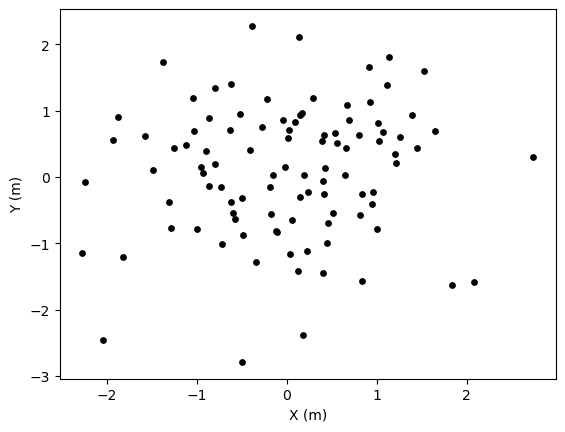

In [9]:
# A basic plot with matplotlib
x = np.random.normal(size = 100)
y = np.random.normal(size = 100)
plt.scatter(x, y, 15, c='black')
plt.xlabel('X (m)')
plt.ylabel('Y (m)')
plt.savefig('scatter.png')

## Everything is an Object

All "variables" in Python are some sort of Object; Python is object-oriented from the ground up. What does this mean? Objects can carry around with them all sorts of information about themselves that makes them very flexible. This can lead to trouble if you are not careful!

Objects come in different "classes". E.g. there is a "str" class, which is used to contain strings.

Objects have

 * Attributes: values that can be set
 * Methods: functions that can be run 
 

In [10]:
help("")

Help on class str in module builtins:

class str(object)
 |  str(object='') -> str
 |  str(bytes_or_buffer[, encoding[, errors]]) -> str
 |  
 |  Create a new string object from the given object. If encoding or
 |  errors is specified, then the object must expose a data buffer
 |  that will be decoded using the given encoding and error handler.
 |  Otherwise, returns the result of object.__str__() (if defined)
 |  or repr(object).
 |  encoding defaults to sys.getdefaultencoding().
 |  errors defaults to 'strict'.
 |  
 |  Methods defined here:
 |  
 |  __add__(self, value, /)
 |      Return self+value.
 |  
 |  __contains__(self, key, /)
 |      Return key in self.
 |  
 |  __eq__(self, value, /)
 |      Return self==value.
 |  
 |  __format__(self, format_spec, /)
 |      Return a formatted version of the string as described by format_spec.
 |  
 |  __ge__(self, value, /)
 |      Return self>=value.
 |  
 |  __getattribute__(self, name, /)
 |      Return getattr(self, name).
 |  
 |  

You can define a simple class:

In [11]:
class Example(object): # object is the generic "superclass"
    """Just an example object
    
    Parameters
    ----------
    
    name : str
        Name of this example 
        
    number : np.int32
        Number associated with this example 
    
    Attributes
    ----------
    
    name : str
        Name of this example 
        
    number : np.int32
        Number associated with this example 
"""
    def __init__(self, name=None, number=None): # "self" is the object itself, and is passed in as first argument
        self._initialize(name=name, number=number)
        # by convention, "_" denotes an attribute or method that should not be used outside the 
        # the class definition (for example, its nature may change in future versions)
        self._template = "This example has name {name} and number {number}" 
        return
    
    def _initialize(self, name=None, number=None):
        self.name = str(name)
        self.number = np.int32(number)
        return
    
    def identify(self):
        """Identify this Example object by name and number"""
        print(self._template.format(name=self.name, number=self.number))
        return

example1 = Example(name="Peter", number=899)
example2 = Example(name="Lucy", number=7878)

example1.identify()
example2.identify()

This example has name Peter and number 899
This example has name Lucy and number 7878


A very common thing to see is the definition of "subclasses", which inherit the methods of their superclasses.

In [11]:
class SpecificExample(Example): # Example is the "superclass", so Specific Example inherits from it
    """A specific example object

    
    Parameters
    ----------
    
    name : str
        Name of this example 
        
    number : np.int32
        Number associated with this example 
    
    Attributes
    ----------
    
    name : str
        Name of this example 
        
    number : np.int32
        Number associated with this example 
"""
    def __init__(self, name=None, number=None):
        self._initialize(name=name, number=number)
        self._template = "This example has the specific name {name} and specific number {number}" 
        return

specificexample1 = SpecificExample(name="Peter", number=899)
specificexample2 = SpecificExample(name="Lucy", number=7878)

specificexample1.identify()
specificexample2.identify()

This example has the specific name Peter and specific number 899
This example has the specific name Lucy and specific number 7878


I'm mostly introducing these ideas here because you will see the use of classes and subclasses, and it is important to understand the concepts to use them properly in Python.

Defining your own classes can yield very powerful tools. It takes some experience to figure out the sensible choices for how to define classes and subclasses. 

## Representation of integer numbers

The first real important thing you should become aware of in computational physics is the representation of numbers on computers. Here we will explore some examples of this.

First, I will define a function to extract the bits from a quantity.

In [12]:
def get_bits(number):
    """For a NumPy quantity, return bit representation
    
    Parameters
    ----------
    
    number : NumPy value
        value to convert into list of bits
        
    Returns
    -------
    
    bits : list
       list of 0 and 1 values, highest to lowest significance
"""
    bytes = number.tobytes()
    bits = []
    for byte in bytes:
        bits = bits + np.flip(np.unpackbits(np.uint8(byte)), np.uint8(0)).tolist()
    return list(reversed(bits))

The simplest examples are unsigned 8-bit integers. I will define a NumPy quantity of this type, and then show the bits that express it.

In [13]:
for value in [1, 2, 5, 65, 255]:
    print("{value} decimal -> {bitlist}".format(value=value, bitlist=str(get_bits(np.uint8(value)))))

1 decimal -> [0, 0, 0, 0, 0, 0, 0, 1]
2 decimal -> [0, 0, 0, 0, 0, 0, 1, 0]
5 decimal -> [0, 0, 0, 0, 0, 1, 0, 1]
65 decimal -> [0, 1, 0, 0, 0, 0, 0, 1]
255 decimal -> [1, 1, 1, 1, 1, 1, 1, 1]


We can see what happens if you increment a value past 255 for an 8-bit integer. It is important to remember that the integers have a limited range when expressed this way (though it is a much larger range for 32- or 64-bit integers)! In Python, a warning is issued when this happens, but this does not happen in all computing environments!

In [14]:
value = np.uint8(250)
for indx in np.arange(10):
    print("{value} in decimal -> {bitlist}".format(value=value, bitlist=str(get_bits(np.uint8(value)))))
    value = value + np.uint8(1)

250 in decimal -> [1, 1, 1, 1, 1, 0, 1, 0]
251 in decimal -> [1, 1, 1, 1, 1, 0, 1, 1]
252 in decimal -> [1, 1, 1, 1, 1, 1, 0, 0]
253 in decimal -> [1, 1, 1, 1, 1, 1, 0, 1]
254 in decimal -> [1, 1, 1, 1, 1, 1, 1, 0]
255 in decimal -> [1, 1, 1, 1, 1, 1, 1, 1]
0 in decimal -> [0, 0, 0, 0, 0, 0, 0, 0]
1 in decimal -> [0, 0, 0, 0, 0, 0, 0, 1]
2 in decimal -> [0, 0, 0, 0, 0, 0, 1, 0]
3 in decimal -> [0, 0, 0, 0, 0, 0, 1, 1]


/tmp/ipykernel_551173/3105002815.py:4: RuntimeWarning: overflow encountered in scalar add
  value = value + np.uint8(1)


For a signed integer, the upper half of the range is remapped to the negative numbers.

In [15]:
for value in [-128, -127, -2, -1, 0, 1, 127]:
    print("{value} decimal -> {bitlist}".format(value=value, bitlist=str(get_bits(np.int8(value)))))

-128 decimal -> [1, 0, 0, 0, 0, 0, 0, 0]
-127 decimal -> [1, 0, 0, 0, 0, 0, 0, 1]
-2 decimal -> [1, 1, 1, 1, 1, 1, 1, 0]
-1 decimal -> [1, 1, 1, 1, 1, 1, 1, 1]
0 decimal -> [0, 0, 0, 0, 0, 0, 0, 0]
1 decimal -> [0, 0, 0, 0, 0, 0, 0, 1]
127 decimal -> [0, 1, 1, 1, 1, 1, 1, 1]


So you can see what happens now when you roll around 127 (instead of 255 as in the unsigned case).

In [16]:
value = np.int8(124)
for indx in np.arange(10):
    print("{value} in decimal -> {bitlist}".format(value=value, bitlist=str(get_bits(np.int8(value)))))
    value = value + np.int8(1)

124 in decimal -> [0, 1, 1, 1, 1, 1, 0, 0]
125 in decimal -> [0, 1, 1, 1, 1, 1, 0, 1]
126 in decimal -> [0, 1, 1, 1, 1, 1, 1, 0]
127 in decimal -> [0, 1, 1, 1, 1, 1, 1, 1]
-128 in decimal -> [1, 0, 0, 0, 0, 0, 0, 0]
-127 in decimal -> [1, 0, 0, 0, 0, 0, 0, 1]
-126 in decimal -> [1, 0, 0, 0, 0, 0, 1, 0]
-125 in decimal -> [1, 0, 0, 0, 0, 0, 1, 1]
-124 in decimal -> [1, 0, 0, 0, 0, 1, 0, 0]
-123 in decimal -> [1, 0, 0, 0, 0, 1, 0, 1]


/tmp/ipykernel_551173/777199071.py:4: RuntimeWarning: overflow encountered in scalar add
  value = value + np.int8(1)


These days, usually the default integer value is 32-bits, which covers most (but not all!) cases of interest. It's maximum value in the signed case is $2^{31}-1 = 2147483647$, which is just over 2 billion. Definitely astronomers and physicists use catalogs with that many entries so need integers larger than that! Here are some examples.

In [17]:
for value in [-10000000, -2, 1, 200000]:
    print("{value} decimal -> {bitlist}".format(value=value, bitlist=str(get_bits(np.int32(value)))))

-10000000 decimal -> [1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0]
-2 decimal -> [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0]
1 decimal -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
200000 decimal -> [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0]


## Representation of floating point numbers

In [18]:
for value in [0., 1., 1.5, 2., 5000., - 5000., 1.4e-45, 3.40055e+38, 1.e+100]:
    bitlist=get_bits(np.float32(value))
    sign = bitlist[0]
    exponent = bitlist[1:9]
    mantissa = bitlist[9:32]
    template = """{value} decimal ->
       sign = {sign} 
       exponent = {exponent} 
       mantissa = {mantissa}"""
    print(template.format(value=value, sign=sign, exponent=exponent, mantissa=mantissa))

0.0 decimal ->
       sign = 0 
       exponent = [0, 0, 0, 0, 0, 0, 0, 0] 
       mantissa = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.0 decimal ->
       sign = 0 
       exponent = [0, 1, 1, 1, 1, 1, 1, 1] 
       mantissa = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.5 decimal ->
       sign = 0 
       exponent = [0, 1, 1, 1, 1, 1, 1, 1] 
       mantissa = [1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
2.0 decimal ->
       sign = 0 
       exponent = [1, 0, 0, 0, 0, 0, 0, 0] 
       mantissa = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
5000.0 decimal ->
       sign = 0 
       exponent = [1, 0, 0, 0, 1, 0, 1, 1] 
       mantissa = [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
-5000.0 decimal ->
       sign = 1 
       exponent = [1, 0, 0, 0, 1, 0, 1, 1] 
       mantissa = [0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
1.4e-45 d

/tmp/ipykernel_551173/2466061547.py:2: RuntimeWarning: overflow encountered in cast
  bitlist=get_bits(np.float32(value))


In [19]:
value_big = np.float32(1.)
value_small = np.float32(1.e-8)
bitlist = get_bits(np.float32(value_big))
e10 = np.array([ ee * 2**(7-indx) for indx, ee in zip(range(8), bitlist[1:9])], dtype=np.int32).sum() - 127
print("Exponent of {value}: {exponent} --> {e10}".format(value=value_big, exponent=bitlist[1:9], e10=e10))
print("Mantissa of {value}: {mantissa}".format(value=value_big, mantissa=bitlist[9:]))
bitlist = get_bits(np.float32(value_small))
e10 = np.array([ ee * 2**(7-indx) for indx, ee in zip(range(8), bitlist[1:9])], dtype=np.int32).sum() - 127
print("Exponent of {value}: {exponent} --> {e10}".format(value=value_small, exponent=bitlist[1:9], e10=e10))
print("Mantissa of {value}: {mantissa}".format(value=value_small, mantissa=bitlist[9:]))

Exponent of 1.0: [0, 1, 1, 1, 1, 1, 1, 1] --> 0
Mantissa of 1.0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
Exponent of 9.99999993922529e-09: [0, 1, 1, 0, 0, 1, 0, 0] --> -27
Mantissa of 9.99999993922529e-09: [0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1]


In adding these two numbers, the computer needs to make the exponents the same. So it shifts the mantissa of 1.e-8 to the right.

The number 1e-8, originally expressed as:

 * exponent [0, 1, 1, 0, 0, 1, 0, 0] -> (-27) 
 * mantissa [0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1] 
 
becomes as follows:

 * exponent [0, 1, 1, 0, 0, 1, 0, 1] -> (-26)
 * mantissa [0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1]
 
Note that this is a lower precision way to express 1.e-8, because you have lost the last bit (of relative importance of $2^{-23} \sim 10^{-7}$). So no matter how far you have to shift the bits, you always lose some precision from doing so.

In this case, shifting continues until the exponent is the same as for 1.0 (i.e. 0). But that requires shifting 27 bits to the right, and the mantissa only has 23 bits. So it is completely zeroed out. So adding the resulting mantissa to that of 1.0 results in no change.

And indeed:

In [20]:
value = value_big + value_small
bitlist = get_bits(np.float32(value))
e10 = np.array([ ee * 2**(7-indx) for indx, ee in zip(range(8), bitlist[1:9])], dtype=np.int32).sum() - 127
print("Exponent of {value}: {exponent} --> {e10}".format(value=value, exponent=bitlist[1:9], e10=e10))
print("Mantissa of {value}: {mantissa}".format(value=value, mantissa=bitlist[9:]))

Exponent of 1.0: [0, 1, 1, 1, 1, 1, 1, 1] --> 0
Mantissa of 1.0: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


These considerations have important effects on how the computer should calculate things to keep them stable against this truncation error. A simple example is just adding up a bunch of small numbers:

In [21]:
# Here is a dumb way to add up a bunch of numbers that are supposed to add to unity.
f = np.float32(0.)
incr = np.float32(1.e-8)
for i in np.arange(100000000):
    f = f + incr
print(f)

0.25


In [22]:
# This is just as dumb but because it is working at 64-bit precision works out OK.
f = np.float64(0.)
incr = np.float64(1.e-8)
for i in np.arange(100000000):
    f = f + incr
print(f)

1.0000000022898672


In [23]:
# Note that NumPy must do something smarter with its array method sum()!
incrs = np.ones(100000000, dtype=np.float32) * np.float32(1.e-8)
print(incrs.sum() - 1.)

incrs = np.ones(100000000, dtype=np.float64) * np.float64(1.e-8)
print(incrs.sum() - 1.)

-0.00011271238327026367
-2.000621890374532e-13


You should also note that the NumPy method is faster. This is because this is programmed closer to machine level. Generally if something requires a Python loop or conditionals, it is going to be slower than using internal methods. This is the price of using a higher level language like Python.